## Task 1

In [1]:
#subtask 1.1

#To load the Raw data file into Data Frame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

%matplotlib inline
df = pd.read_csv('chocolate.csv', na_values = ["",'','\xc2\xa0'], header = 0)

In [2]:
#Changing column names
columns_name = ['Company', 'Bean Origin', 'REF', 'Review Year', 'Cocoa Percentage', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin'] 
df.columns = columns_name
df

,Company,Bean Origin,REF,Review Year,Cocoa Percentage,Company Location,Rating,Bean Type,Broad Bean Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


In [3]:
df.dtypes


Company               object
Bean Origin           object
REF                    int64
Review Year            int64
Cocoa Percentage      object
Company Location      object
Rating               float64
Bean Type             object
Broad Bean Origin     object
dtype: object

In [4]:
df['Broad Bean Origin'].value_counts()

Venezuela              174
Ecuador                164
Peru                   140
Dominican Republic     120
Madagascar             120
                      ... 
Mad., Java, PNG          1
Venezuela, Java          1
Ven, Bolivia, D.R.       1
Peru, Ecuador            1
Venezuela, Trinidad      1
Name: Broad Bean Origin, Length: 93, dtype: int64

In [5]:
## Look at most frequent origin countries
df['Broad Bean Origin'].value_counts().head(20)

Venezuela             174
Ecuador               164
Peru                  140
Dominican Republic    120
Madagascar            120
                       61
Nicaragua              53
Brazil                 48
Bolivia                45
Belize                 40
Papua New Guinea       39
Colombia               37
Costa Rica             34
Vietnam                28
Trinidad               28
Ghana                  28
Guatemala              27
Mexico                 27
Tanzania               26
Hawaii                 21
Name: Broad Bean Origin, dtype: int64

In [6]:
print(df['Broad Bean Origin'].value_counts().head())
print("Missing Spaces encoded as:")
list(df['Broad Bean Origin'][0:20])

Venezuela             174
Ecuador               164
Peru                  140
Dominican Republic    120
Madagascar            120
Name: Broad Bean Origin, dtype: int64
Missing Spaces encoded as:


['Madagascar',
 '\xa0',
 'Costa Rica',
 'Nicaragua',
 'Colombia',
 'Ecuador',
 'Madagascar',
 '\xa0',
 'Trinidad',
 'Colombia',
 'Venezuela',
 'Dominican Republic',
 'Madagascar',
 'Peru',
 'Peru, Mad., Dom. Rep.',
 'Domincan Republic',
 'Costa Rica',
 'Costa Rica',
 'Jamaica',
 'Vietnam']

In [7]:
df.isnull().sum()

Company              0
Bean Origin          0
REF                  0
Review Year          0
Cocoa Percentage     0
Company Location     0
Rating               0
Bean Type            1
Broad Bean Origin    1
dtype: int64

In [8]:
#Converting String into Integers for better classification

df['Cocoa Percentage'] = df['Cocoa Percentage'].str.replace('%', '')
df['Cocoa Percentage'] = df['Cocoa Percentage'].str.replace('.', '')
df['Cocoa Percentage'] = df['Cocoa Percentage'].astype(int)

In [9]:
#Since only 62 values are missing we will fill the missing values with mode of the column
df['Broad Bean Origin'] = df['Broad Bean Origin'].fillna(df['Broad Bean Origin'].mode()[0])

In [10]:
df.head()

,Company,Bean Origin,REF,Review Year,Cocoa Percentage,Company Location,Rating,Bean Type,Broad Bean Origin
0,Valrhona,Manjari,129,2007,64,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65,Colombia,3.50,CCN51,Colombia


In [11]:
df.isnull().sum()

Company              0
Bean Origin          0
REF                  0
Review Year          0
Cocoa Percentage     0
Company Location     0
Rating               0
Bean Type            1
Broad Bean Origin    0
dtype: int64

In [12]:
## imports
import os
import re


## Text preparation (correction) func
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$ ,|Madagascar,Java,Papua New Guinea', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$, |Ecuador,Madagascar,Papua New Guinea', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text


In [13]:
df['Broad Bean Origin'].str.replace('.', '').apply(txt_prep).unique()


array(['Madagascar', '\xa0', 'Costa Rica', 'Nicaragua', 'Colombia',
       'Ecuador', 'Trinidad', 'Venezuela', 'Dominican Republic', 'Peru',
       'Peru,Madagascar,Dominican Republic', 'Jamaica', 'Vietnam',
       'Mexico', 'Honduras', 'Guatemala', 'Sri Lanka', 'Indonesia',
       'Puerto Rico', 'St Lucia', 'Hawaii', 'Peru,Ecuador', 'Ghana',
       'Brazil', 'Ivory Coast', 'Uganda', 'Samoa', 'Tanzania',
       'Papua New Guinea', 'Togo', 'Bolivia', 'Panama', 'Belize',
       'Vanuatu', 'Fiji', 'Peru,Madagascar', 'Central,South America',
       'Tobago', 'Sao Tome', 'Trinidad,Tobago', 'Cuba',
       'Venezuela,Bolivia,Dominican Republic', 'Sao Tome,Principe',
       'Carribean', 'Venezuela,Dominican Republic',
       'Dominican Republic,Bali', 'Ghana,Panama,Ecuador', 'Grenada',
       'Principe', 'Venezuela,Trinidad', 'Australia', 'South America',
       'Colombia,Ecuador', 'Ecuador,Costa Rica', 'South America,Africa',
       'Malaysia', 'Congo', 'Papua New Guinea,Vanuatu,Mad',
       

Venezuela              175
Ecuador                164
Peru                   140
Dominican Republic     120
Madagascar             120
                      ... 
Mad., Java, PNG          1
Venezuela, Java          1
Ven, Bolivia, D.R.       1
Peru, Ecuador            1
Venezuela, Trinidad      1
Name: Broad Bean Origin, Length: 93, dtype: int64

In [15]:
#Assigned with the function to correct grammar in Origin
df['Broad Bean Origin'] = df['Broad Bean Origin'].str.replace('.', '').apply(txt_prep)


In [16]:
#See the difference
df['Broad Bean Origin'].value_counts().tail(20)

Madagascar,Java,Papua New Guinea        1
Venezuela,Java                          1
Indonesia,Ghana                         1
Martinique                              1
Ghana,Panama,Ecuador                    1
Dominican Republic,Bali                 1
Venezuela,Trinidad,Mad                  1
Suriname                                1
Peru,Dominican Republic                 1
South America,Africa                    1
Venezuela,Bolivia,Dominican Republic    1
Peru,Madagascar                         1
Nigeria                                 1
Venezuela,Trinidad                      1
Dominican Republic,Ecuador,Peru         1
Ecuador,Madagascar,Papua New Guinea     1
Peru,Belize                             1
Peru,Madagascar,Dominican Republic      1
Papua New Guinea,Vanuatu,Mad            1
Madagascar,Ecuador                      1
Name: Broad Bean Origin, dtype: int64

In [17]:
#Fixing the issues in Company Location Names so we can do geo visualisation later on
df['Company Location'] = df['Company Location'].str.replace('Eucador','Ecuador')\
                               .str.replace('Amsterdam','Netherlands')\
                               .str.replace('Belgium','Germany')\
                               .str.replace('Domincan Republic', 'Dominican Republic')\
                               .str.replace('Niacragua', 'Nicaragua')\
                               .str.replace('U.K.', 'England')\
                               .str.replace('U.S.A.', 'United States of America')

In [18]:
df.head()

,Company,Bean Origin,REF,Review Year,Cocoa Percentage,Company Location,Rating,Bean Type,Broad Bean Origin
0,Valrhona,Manjari,129,2007,64,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70,United States of America,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70,United States of America,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65,Colombia,3.50,CCN51,Colombia


In [19]:
df['Bean Type'].value_counts()
df['Bean Type'].nunique()
df['Broad Bean Origin'].nunique()
df['Bean Origin'].nunique()
df['Company'].nunique()




391

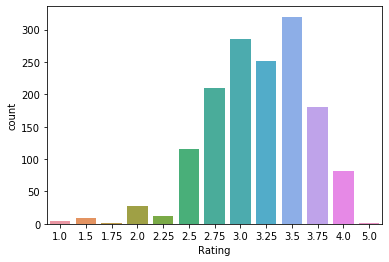

In [20]:
sns.countplot(x = df['Rating'])

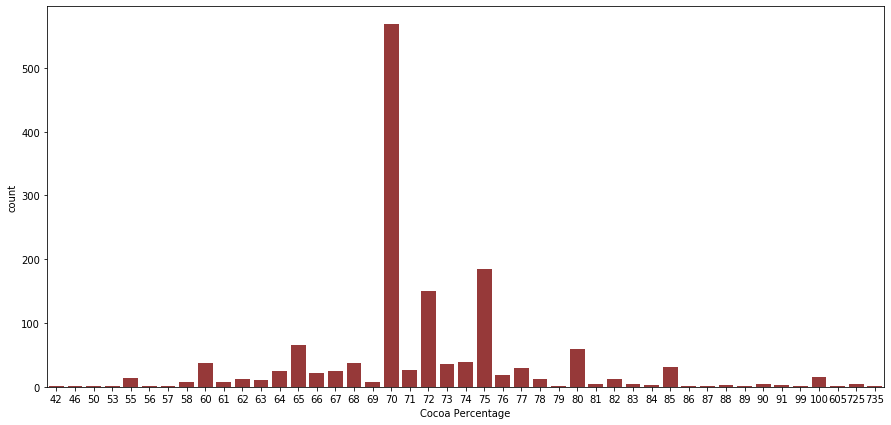

In [21]:
#We can see the values are not distributed properly
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa Percentage', data = df, color = 'brown')



In [22]:
df.columns

Index(['Company', 'Bean Origin', 'REF', 'Review Year', 'Cocoa Percentage',
       'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin'],
      dtype='object')

In [23]:
#We will fix the above problem by specifying range if the percent is above 100 then convert it to float for example
#605 will be 60.5 
def normaliseIt(percentage):
    if percentage > 100:
        percentage = int(str(percentage)[:2])
    return percentage

In [24]:
df['Cocoa Percentage'] = df['Cocoa Percentage'].apply(normaliseIt)

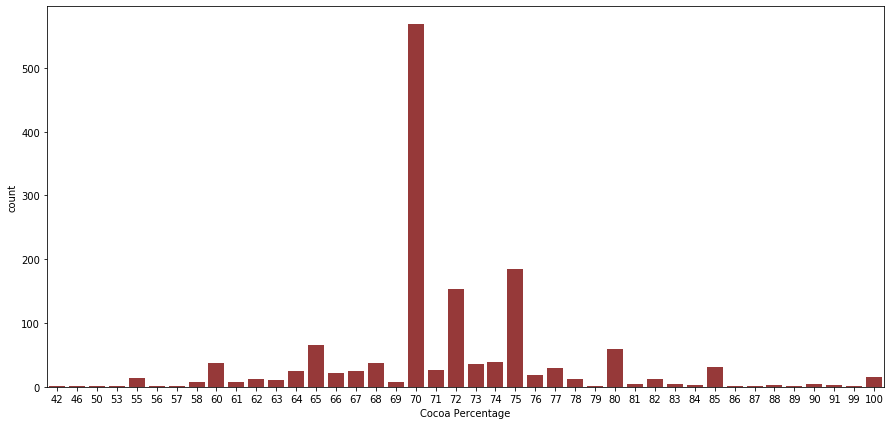

In [25]:
#Lets try again and it looks fine now
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa Percentage', data = df, color = 'brown')

In [26]:
df['Rating'].value_counts()

3.50    320
3.00    285
3.25    251
2.75    210
3.75    181
2.50    115
4.00     82
2.00     28
2.25     12
1.50      9
1.00      4
5.00      2
1.75      1
Name: Rating, dtype: int64

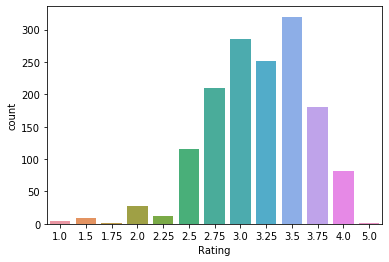

In [27]:
sns.countplot(x = 'Rating', data=df)

In [28]:
#Converting rating (our target variable) to integer first
df['Rating'] = (df['Rating']* 100).astype(int)
df['Rating'].head(5)

0    400
1    325
2    350
3    350
4    350
Name: Rating, dtype: int32

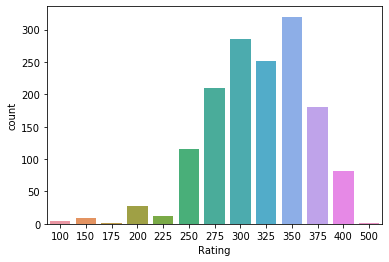

In [29]:
#We can notice that most ratings are between 3 and 3.5
sns.countplot(x = 'Rating', data=df)

In [30]:
def rating_conv(rating):
    
    rating = int(rating)
    
    if (rating > 0 ) and (rating <= 50 ):
        return 0.5
    elif (rating > 100 ) and (rating <= 200 ):
        return 2.0
    elif (rating > 200 ) and (rating <= 300 ):
        return 3.0
    elif (rating > 300 ) and (rating <= 400 ):
        return 4.0
    else:
        return 5.0

In [31]:
#Lets apply it
df['Rating'] = df['Rating'].apply(rating_conv)

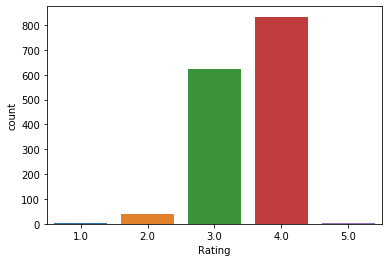

In [32]:
#Values are rounded
sns.countplot(x = 'Rating', data=df)

In [33]:
#Makes sense since most ratings were between 3 and 3.5
df['Rating'].value_counts()

4.0    834
3.0    622
2.0     38
1.0      4
5.0      2
Name: Rating, dtype: int64

In [34]:
#we will put other as the missing values
df['Bean Type'].value_counts()
print ("Missing values", df['Bean Type'].isnull().sum())


Missing values 1


In [35]:
df['Bean Type'] = df['Bean Type'].replace(np.nan, "Other")

In [36]:
#it is visible now
df['Bean Type'].value_counts()


                            750
Trinitario                  342
Criollo                     128
Forastero                    67
Forastero (Nacional)         46
Blend                        34
Criollo, Trinitario          33
Forastero (Arriba)           32
Trinitario, Criollo           9
Forastero (Parazinho)         8
Criollo (Porcelana)           8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Beniano                       3
EET                           3
Criollo (Ocumare 61)          2
Matina                        2
Trinitario (85% Criollo)      2
Amazon mix                    2
Amazon, ICS                   2
Criollo, Forastero            2
CCN51                         1
Trinitario (Amelonado)        1
Criollo (Ocumare 67)          1
Forastero, Trinitario         1
Trinitario, TCGA              1
Criollo (Wild)                1
Trinitario, Forastero         1
Trinitario, Nacional          1
Forastero (Arriba) ASSS       1
Blend-Forastero,Criollo       1
Other   

In [37]:
#now we will create dummy variables for categorical columns
df.head(20)

,Company,Bean Origin,REF,Review Year,Cocoa Percentage,Company Location,Rating,Bean Type,Broad Bean Origin
0,Valrhona,Manjari,129,2007,64,France,4.0,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80,Switzerland,4.0,Blend,
2,Potomac,Upala w/ nibs,647,2011,70,United States of America,4.0,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70,United States of America,4.0,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65,Colombia,4.0,CCN51,Colombia
5,Salgado,Rio Arriba,292,2008,70,Argentina,4.0,Forastero (Arriba) ASSS,Ecuador
6,Cacao Store,Madagascar,1684,2015,70,Japan,3.0,Trinitario,Madagascar
7,Kaoka (Cemoi),Noir,404,2009,70,France,3.0,,
8,Woodblock,Gran Couva,1042,2013,70,United States of America,4.0,Trinitario,Trinidad
9,Dormouse,"Colombia, Batch 9",1676,2015,80,England,3.0,"Criollo, Trinitario",Colombia


In [38]:
df.columns
df.shape

(1500, 9)

In [39]:
#now we will create dummy variables are categorical columns
df.head(20)
df_geo = df

In [40]:
#We will take develop dummy variables for text based columns
company = pd.get_dummies(df['Company'],drop_first=True)
sbOrigin = pd.get_dummies(df['Bean Origin'],drop_first=True)
companyLocation = pd.get_dummies(df['Company Location'],drop_first=True)
bType = pd.get_dummies(df['Bean Type'],drop_first=True)
bbOrigin = pd.get_dummies(df['Broad Bean Origin'],drop_first=True)

In [41]:
#Join the columns
df = pd.concat([df, company, sbOrigin, companyLocation, bType, bbOrigin], axis = 1)

In [42]:
#We have too many columns because of dummy variables so we will drop the text based columns first and then any duplicate
#Columns
df.shape
df.drop(['Company', 'Bean Origin','Company Location', 'Bean Type', 
         'Broad Bean Origin'], axis = 1, inplace = True )

In [43]:
df.shape
#Dropping duplicate columns now
df = df.loc[:,~df.columns.duplicated()]

In [44]:
#Final df that can be used for ML
df.shape
df.columns

Index(['REF', 'Review Year', 'Cocoa Percentage', 'Rating', 'AMMA', 'Acalli',
       'Adi', 'Aequare (Gianduja)', 'Ah Cacao', 'Akesson's (Pralus)',
       ...
       'Trinidad,Tobago', 'Venezuela,Africa,Brasil,Peru,Mexico',
       'Venezuela,Bolivia,Dominican Republic', 'Venezuela,Dominican Republic',
       'Venezuela,Ecuador,Peru,Nicaragua', 'Venezuela,Ghana', 'Venezuela,Java',
       'Venezuela,Trinidad', 'Venezuela,Trinidad,Ecuador',
       'Venezuela,Trinidad,Mad'],
      dtype='object', length=1393)

In [45]:
#Checkign the shape of the dataFrame
df.shape

(1500, 1393)

In [46]:
#Checking for duplicates

df.duplicated().sum()

0

Since the Dataset is free from null values and duplicates we can not split the data into training and testing dataframes

In [47]:
#Creating 2 Dataframes for the prediction process

X = df.drop(['Rating'],axis=1) #Features
y = df['Rating']   # Target Variables
X.head()

,REF,Review Year,Cocoa Percentage,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),Alain Ducasse,...,"Trinidad,Tobago","Venezuela,Africa,Brasil,Peru,Mexico","Venezuela,Bolivia,Dominican Republic","Venezuela,Dominican Republic","Venezuela,Ecuador,Peru,Nicaragua","Venezuela,Ghana","Venezuela,Java","Venezuela,Trinidad","Venezuela,Trinidad,Ecuador","Venezuela,Trinidad,Mad"
0,129,2007,64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1442,2014,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,647,2011,70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1538,2015,70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1888,2016,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y.sample(10)

477     4.0
1433    3.0
177     4.0
514     3.0
1235    3.0
998     3.0
469     4.0
170     3.0
74      4.0
601     3.0
Name: Rating, dtype: float64

In [49]:
#Creating the Train - Test split inside the dataset

from sklearn.model_selection import train_test_split #training and testing data split


# We will be splitting the train - test ration to 70 : 30 proportion.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((450, 1392), (450,))

For the learning algorithms, we will be selecting K-NN (K-Nearest Neighbours), ANN (Artificial Neural Networks) and Random Forest

<h2> Random Forest Algorithm </h2>

In [50]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf = clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6533333333333333


In [51]:
from sklearn.metrics import classification_report, accuracy_score
classification_report(y_test,y_pred)
print ("accuracy test", (accuracy_score(y_test,y_pred)*100))

accuracy test 65.33333333333333


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-Nearest Neighbours (K-NN)

In [52]:
# importing K-Nearest Neighbours Model
from sklearn.neighbors import KNeighborsClassifier

#Train the KNN model with K = 6 on the training set.
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [53]:
#Analyze the execution of the trained model on the test set by 
#estimating and demonstrating the confusion matrix and the accuracy for K to 6, 7, 8, 9 and 10, respectively

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kValues = [6, 7, 8, 9, 10]
for eachK in kValues:
    # Training
    eachModel = KNeighborsClassifier(n_neighbors=eachK)
    eachModel.fit(X_train, y_train)
    
    # Testing
    print('-'*20)
    print('k =', eachK)
    eachPred = eachModel.predict(X_test)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test, eachPred))
    print('Accuracy: %.2f' % accuracy_score(y_test, eachPred))
    print('-'*20)

--------------------
k = 6
Confusion matrix: 
[[  0   1   0   0   0]
 [  0   0   6   5   0]
 [  0   1 103  77   0]
 [  0   2 105 149   0]
 [  0   0   1   0   0]]
Accuracy: 0.56
--------------------
--------------------
k = 7
Confusion matrix: 
[[  0   0   1   0   0]
 [  0   0   7   4   0]
 [  0   0  86  95   0]
 [  0   0  69 187   0]
 [  0   0   1   0   0]]
Accuracy: 0.61
--------------------
--------------------
k = 8
Confusion matrix: 
[[  0   1   0   0   0]
 [  0   0   7   4   0]
 [  0   0 103  78   0]
 [  0   0  94 162   0]
 [  0   0   0   1   0]]
Accuracy: 0.59
--------------------
--------------------
k = 9
Confusion matrix: 
[[  0   1   0   0   0]
 [  0   0   7   4   0]
 [  0   0  83  98   0]
 [  0   2  69 185   0]
 [  0   0   1   0   0]]
Accuracy: 0.60
--------------------
--------------------
k = 10
Confusion matrix: 
[[  0   0   1   0   0]
 [  0   0   6   5   0]
 [  0   0  95  86   0]
 [  0   0  90 166   0]
 [  0   0   1   0   0]]
Accuracy: 0.58
--------------------


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# For k 6 to 10
k_range = range(6, 10)
k_scores = []


#iterating to caclulate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kfCV = KFold(n_splits=3, random_state=0, shuffle=True)
    scores = cross_val_score(knn, X, y, cv=kfCV, scoring='accuracy')
    k_scores.append(scores.mean())
    print('n-fold=3')
    print(k_scores)
    
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kfCV = KFold(n_splits=4, random_state=0, shuffle=True)
    scores = cross_val_score(knn, X, y, cv=kfCV, scoring='accuracy')
    k_scores.append(scores.mean())
    print('n-fold=4')
    print(k_scores)


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kfCV = KFold(n_splits=5, random_state=0, shuffle=True)
    scores = cross_val_score(knn, X, y, cv=kfCV, scoring='accuracy')
    k_scores.append(scores.mean())
    print('n-fold=5')
    print(k_scores)

n-fold=3
[0.5693333333333332]
n-fold=3
[0.5693333333333332, 0.5773333333333334]
n-fold=3
[0.5693333333333332, 0.5773333333333334, 0.5613333333333334]
n-fold=3
[0.5693333333333332, 0.5773333333333334, 0.5613333333333334, 0.5626666666666668]
n-fold=4
[0.5693333333333332, 0.5773333333333334, 0.5613333333333334, 0.5626666666666668, 0.5640000000000001]
n-fold=4
[0.5693333333333332, 0.5773333333333334, 0.5613333333333334, 0.5626666666666668, 0.5640000000000001, 0.5766666666666667]
n-fold=4
[0.5693333333333332, 0.5773333333333334, 0.5613333333333334, 0.5626666666666668, 0.5640000000000001, 0.5766666666666667, 0.5646666666666667]
n-fold=4
[0.5693333333333332, 0.5773333333333334, 0.5613333333333334, 0.5626666666666668, 0.5640000000000001, 0.5766666666666667, 0.5646666666666667, 0.5753333333333333]
n-fold=5
[0.5693333333333332, 0.5773333333333334, 0.5613333333333334, 0.5626666666666668, 0.5640000000000001, 0.5766666666666667, 0.5646666666666667, 0.5753333333333333, 0.5486666666666666]
n-fold=5
[

## Artificial Neural Networks

In [55]:
#Import Neural Network model
from sklearn.neural_network import MLPClassifier 

#Create a Multi-layer Perception classifier
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,  hidden_layer_sizes=(3, 3), random_state=1)  

#Train the model using the training sets y_pred=MLP_trained.predict(X_test)
MLP_trained = MLP.fit(X_train,y_train)
y_pred =MLP_trained.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5688888888888889


In [56]:
#load libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ANN', MLPClassifier(solver='lbfgs', alpha=1e-5,  hidden_layer_sizes=(3, 3), random_state=1)))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('n-fold=3')
    print('%s: %f (%f)\n' % (name, cv_results.mean(), cv_results.std()))
for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('n-fold=4')
    print('%s: %f (%f)\n' % (name, cv_results.mean(), cv_results.std()))
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('n-fold=5')
    print('%s: %f (%f)\n' % (name, cv_results.mean(), cv_results.std()))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=3
LR: 0.583810 (0.019000)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=3
KNN: 0.554286 (0.028667)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=3
CART: 0.556190 (0.021168)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=3
RF: 0.604762 (0.028981)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=3
ANN: 0.550476 (0.001347)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=4
LR: 0.599062 (0.008788)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=4
KNN: 0.542924 (0.035575)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=4
CART: 0.571445 (0.013050)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=4
RF: 0.603877 (0.035690)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=4
ANN: 0.550478 (0.002174)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=5
LR: 0.605714 (0.026836)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=5
KNN: 0.568571 (0.023055)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=5
CART: 0.584762 (0.030327)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=5
RF: 0.615238 (0.033993)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


n-fold=5
ANN: 0.550476 (0.002333)



In [57]:
#load libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6755555555555556
[[  0   0   1   0   0]
 [  0   0   9   2   0]
 [  0   1  86  94   0]
 [  0   0  38 218   0]
 [  0   0   0   1   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00        11
         3.0       0.64      0.48      0.55       181
         4.0       0.69      0.85      0.76       256
         5.0       0.00      0.00      0.00         1

    accuracy                           0.68       450
   macro avg       0.27      0.27      0.26       450
weighted avg       0.65      0.68      0.65       450



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Geographical visualisation 

In [58]:
df_geo.head()

,Company,Bean Origin,REF,Review Year,Cocoa Percentage,Company Location,Rating,Bean Type,Broad Bean Origin
0,Valrhona,Manjari,129,2007,64,France,4.0,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80,Switzerland,4.0,Blend,
2,Potomac,Upala w/ nibs,647,2011,70,United States of America,4.0,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70,United States of America,4.0,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65,Colombia,4.0,CCN51,Colombia


In [59]:
import plotly as pl 
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [60]:
data = dict(type = 'choropleth',
            locations = df_geo['Broad Bean Origin'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = ["green","blue","red"],
            z=df_geo['Rating'],
            marker = dict(line = dict(color = "black",width = 1)),
            colorbar = {'title':'Ratings','len':0.30,'lenmode':'fraction'})

#Initializing the layout variable
layout = dict(geo = dict(scope='world'))

#Initializing the object for graph_objs.Figure class
worldmap = gobj.Figure(data = [data],layout = layout)

#plotting the map
iplot(worldmap)

In [61]:
#Worldmap for company locations
data_co = dict(type = 'choropleth',
            locations = df_geo['Company Location'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = ["green","blue","red","yellow"],
            z=df_geo['Rating'],
            marker = dict(line = dict(color = "black",width = 1)),
            colorbar = {'title':'Ratings','len':0.30,'lenmode':'fraction'})

#Initializing the layout variable
layout = dict(geo = dict(scope='world'))

#Initializing the object for graph_objs.Figure class
worldmap = gobj.Figure(data = [data_co],layout = layout)

#plotting the map
iplot(worldmap)

[5.91051345e-02 3.47463187e-02 6.28171631e-02 ... 6.16157433e-05
 4.25969921e-04 2.82926331e-04]


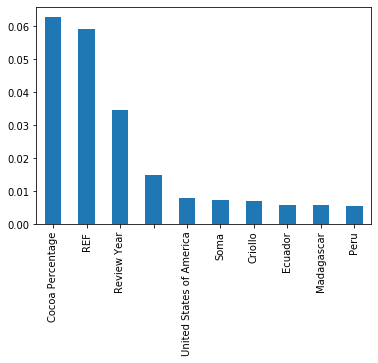

In [62]:
#Univariate selection
#Statistical tests can be used to select those features that have the strongest relationship with the output variable.
#the chi-squared (chi²) statistical test for non-negative features to select best features

X = df.drop(['Rating'],axis=1)  #independent columns
y = df['Rating'] #target column i.e Ratings
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

Tree based classifiers
[8.04920681e-05 5.09350597e-04 6.94008042e-05 ... 5.52871721e-05
 6.13609226e-04 6.43372254e-04]


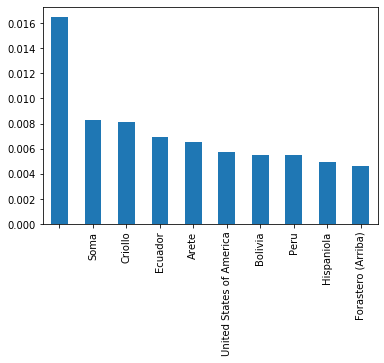

In [63]:

X = df.drop(['Rating', 'REF', 'Review Year', 'Cocoa Percentage'],axis=1)  #independent columns
y = df['Rating'] #target column i.e Ratings
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print('Tree based classifiers')
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

[2.12925065e-02 1.44455412e-02 2.03694399e-02 ... 1.83049483e-05
 2.52720119e-04 7.78642294e-05]


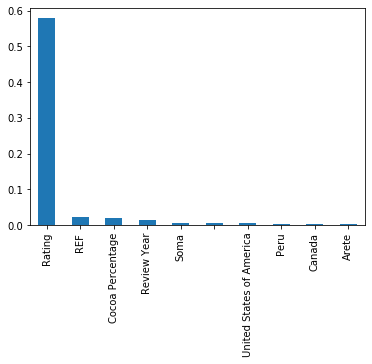

In [64]:
X = df._get_numeric_data()  #independent columns
y = df['Rating'] #target column i.e Ratings
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()